In [129]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [130]:
maxEggsNum = 1024
maxFloorsNum = 1024

In [131]:
def minThrow (eggsNum,floorsNum):
    minThrows = [] 
    jumps = [] 

    for egg in range(eggsNum+1):
        minThrows.append([])
        jumps.append([])
        for floor in range (floorsNum+1):
            if (egg == 0) and (floor == 0):
                minThrows[egg].append(0)
            elif floor == 0:
                minThrows[egg].append(0)
            elif egg == 1:
                minThrows[egg].append(floor)
            elif egg ==0:
                minThrows[egg].append(floorsNum+1)
            else:
                minimum = floorsNum+1 
                minIndex=-1
                for currentFloor in range(1, floor+1):
                    sol = 1+max(minThrows[egg][floor-currentFloor], minThrows[egg-1][currentFloor-1])
                    if sol <= minimum:
                        minimum = sol
                        minIndex = currentFloor
                minThrows[egg].append(minimum)
                jumps[egg].append(minIndex)
    return minThrows


In [132]:
minThrows = minThrow(maxEggsNum, maxFloorsNum)

In [133]:
def throwsDependingOnEggsNum (to, floorsNum):
    eggs = range(1,to)
    minimumThrows = []
    for egg in eggs:
        minimumThrows.append(minThrows[egg][floorsNum])
    plt.plot(eggs, minimumThrows)

In [134]:
def throwsDependingOnFloorsNum (to, eggsNum):
    floors = range(1,to)
    minimumThrows = []
    for floor in floors:
        minimumThrows.append(minThrows[eggsNum][floor])
    plt.plot(floors, minimumThrows)

In [135]:
import matplotlib.pyplot as plt
import numpy as np
def threeDGraph (f, to):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')


    xs = []
    for i in range(f,to+1):
        for j in range(f,to+1):
            xs.append(i)
    ys = []
    for i in range(f,to+1):
        for j in range(f,to+1):
            ys.append(j)
    zs = []
    for egg in range(f,to+1):
        for floor in range(f,to+1):
            zs.append(minThrows[egg][floor])
    ax.scatter(xs, ys, zs)

    ax.set_xlabel('EGGS')
    ax.set_ylabel('FLOORS')
    ax.set_zlabel('MINIMUM THROWS')

    plt.show()

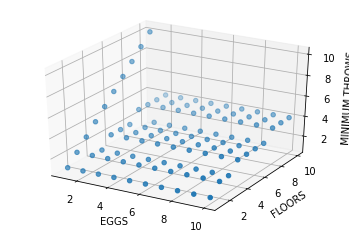

In [136]:
threeDGraph (1,10)

In [137]:
import math
def idealEggsNum(floorsNum):
    IDEAL_THROWS_NUM = (int)(math.log(2*floorsNum,2))
    for i in range(floorsNum+1):
        throwNum = minThrows[i][floorsNum]
        if throwNum == IDEAL_THROWS_NUM:
            return (i)

In [138]:
print (idealEggsNum(63))

6


In [158]:
%matplotlib widget
def idealEggsNumDependingOnFloorsNum (to):
    floors = range(1,to+1)
    idealEggsN =[]
    for i in floors:
        idealEggsN.append(idealEggsNum(i))
    plt.plot(floors, idealEggsN, 'b.')
    return idealEggsN

In [159]:
idealEggsN = idealEggsNumDependingOnFloorsNum(1024)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [167]:
eggsSeries = []
for i in range(1,max(idealEggsN)+1):
    eggsSeries.append([])
    for j in range(len(idealEggsN)):
        if i==idealEggsN[j]:
            eggsSeries[-1].append(j)

In [194]:
eggsSeriesLengths = []
for j in range(len(eggsSeries)):
    eggsSeriesLengths.append([])
    counter = 1
    for i in range(len(eggsSeries[j])-1):
        if(eggsSeries[j][i+1]-eggsSeries[j][i] == 1):
            counter+=1
        else:
            eggsSeriesLengths[-1].append(counter)
            counter = 1
    eggsSeriesLengths[-1].append(counter)

In [195]:
eggsSeriesLengths

[[2],
 [4, 3],
 [1, 4, 10, 10],
 [1, 5, 15, 35, 35],
 [1, 6, 21, 56, 126, 126],
 [1, 7, 28, 84, 210, 1],
 [1, 8, 36, 120],
 [1, 9, 45],
 [1, 10],
 [1]]